In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import nltk
import matplotlib.pyplot as plt
import string
import re
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from io import StringIO
from sklearn.preprocessing import LabelEncoder
import math
from scipy.sparse import hstack, csr_matrix
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import matplotlib
from sklearn.metrics import mean_squared_error
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
import os
import time
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

Using TensorFlow backend.


In [2]:
train=pd.read_csv("train_F3WbcTw.csv")
train.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [3]:
train.shape

(5279, 4)

In [4]:
test=pd.read_csv("test_tOlRoBf.csv")
test.head()

,unique_hash,text,drug
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5279 entries, 0 to 5278
Data columns (total 4 columns):
unique_hash    5279 non-null object
text           5279 non-null object
drug           5279 non-null object
sentiment      5279 non-null int64
dtypes: int64(1), object(3)
memory usage: 165.0+ KB


In [6]:
train['token_length'] = [len(x.split(" ")) for x in train.text]
max(train.token_length),min(train.token_length)

(19890, 2)

In [7]:
test['token_length'] = [len(x.split(" ")) for x in test.text]
max(test.token_length),min(test.token_length)

(31151, 4)

In [8]:
train.loc[train.token_length.idxmax(),'text']

'SERIOUS INFECTIONS Patients treated with Remicade  ® are at increased risk for developing serious infections that may lead to hospitalization or death  [see Warnings and Precautions (5.1) and Adverse Reactions (6.1) ] . Most patients who developed these infections were taking concomitant immunosuppressants such as methotrexate or corticosteroids. Remicade should be discontinued if a patient develops a serious infection or sepsis. Reported infections include: Active tuberculosis, including reactivation of latent tuberculosis. Patients with tuberculosis have frequently presented with disseminated or extrapulmonary disease. Patients should be tested for latent tuberculosis before Remicade use and during therapy.  1,2 Treatment for latent infection should be initiated prior to Remicade use. Invasive fungal infections, including histoplasmosis, coccidioidomycosis, candidiasis, aspergillosis, blastomycosis, and pneumocystosis. Patients with histoplasmosis or other invasive fungal infections

In [9]:
test.loc[test.token_length.idxmax(),'text']

"A type of monoclonal antibody used in cancer detection or therapy. Monoclonal antibodies are laboratory-produced substances that can locate and bind to cancer cells.  A6 A substance being studied in the treatment of cancer. A6 is a small piece of a protein called urokinase (an enzyme that dissolves blood clots or prevents them from forming). It is a type of antiangiogenesis agent and a type of antimetastatic agent. Also called urokinase plasminogen activator (uPA)-derived peptide A6.  AAP An enzyme that is normally found in healthy kidneys. It may be found at high levels in the urine when there are kidney problems. It is used as a biomarker to detect damage to the kidneys caused by drugs and other agents. It may also be used to diagnose certain kidney and liver disorders. Also called alanine aminopeptidase.  abarelix listen (uh-BAYR-eh-lix) A drug used to reduce the amount of testosterone made in patients with advanced symptomatic prostate cancer for which no other treatment options a

In [10]:
train['text'][9]

'Thank you so much…I’m learning a lot here at GRACE.  I should have mentioned my husband’s cancer is in his bones, liver, adrenal, in addition to lung and brain mets as I mentioned.   I truly appreciate the comments on hospice as we just started hospice a few weeks ago…my insurance allows palliative care along with continued anti-cancer treatment.  I only thought of hospice as end-of-life care, thus was hesitant, but it has truly been a blessing as they’ve helped with equipment, medicine, and twice weekly visits give us a bit of a measurement of how my husband is doing.  They have been extremely helpful.   I meant to ask…does Opdivo and/or Tagrisso penetrate the blood brain barrier?  I’ve heard yes and no.  My husband had just started Opdivo (only 5 treatments) and they switched to Irinotecan chemo because of the brain mets.  After the first chemo, he ended up in the hospital with pneumonia.   Thank you again! Gina'

In [11]:
train.loc[train.token_length.idxmin(),'text']

' Sandy'

In [12]:
test.loc[test.token_length.idxmin(),'text']

'Keytruda Carboplatin and Alimta'

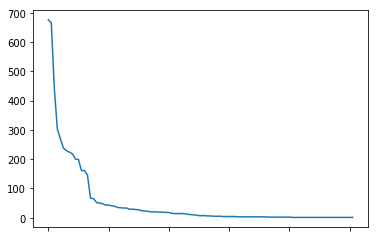

In [13]:
train['drug'].value_counts().plot.line()

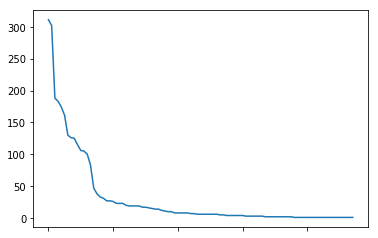

In [14]:
test['drug'].value_counts().plot.line()

In [15]:
train['token_length']

0         76
1        206
2        135
3         20
4        115
5         37
6        118
7        137
8         50
9        169
10       328
11       123
12       239
13      1979
14       137
15      4133
16       107
17        60
18        89
19       101
20       263
21        48
22       146
23       174
24       149
25       176
26       103
27       221
28      2888
29        54
        ... 
5249    2018
5250     128
5251      78
5252     330
5253     116
5254      68
5255     736
5256     602
5257     325
5258      15
5259      83
5260     163
5261     201
5262     233
5263     771
5264      39
5265      17
5266      47
5267      32
5268      60
5269      69
5270    1538
5271      23
5272     126
5273      24
5274     187
5275     150
5276       9
5277     117
5278      95
Name: token_length, Length: 5279, dtype: int64

In [16]:
test['token_length']

0         10
1         27
2        182
3        163
4        537
5         18
6        105
7        167
8         66
9        200
10       117
11       220
12       100
13        97
14       250
15        97
16        72
17       155
18       172
19       364
20       116
21       235
22       958
23        49
24        66
25      1785
26        20
27        23
28        38
29        27
        ... 
2894      36
2895      86
2896     128
2897     217
2898     350
2899     160
2900     111
2901      28
2902      44
2903     471
2904      58
2905     153
2906     205
2907      67
2908    2064
2909      23
2910     745
2911    5063
2912     919
2913     126
2914     146
2915     153
2916     184
2917      83
2918     232
2919     139
2920     244
2921     352
2922      87
2923     120
Name: token_length, Length: 2924, dtype: int64

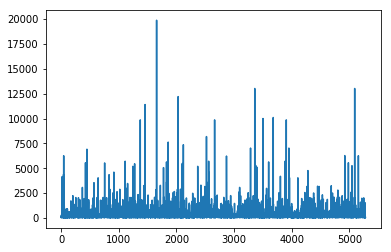

In [17]:
train['token_length'].plot.line()

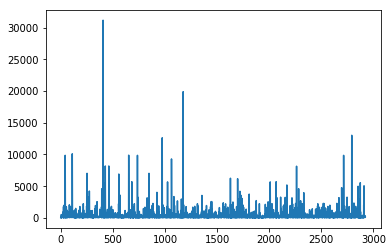

In [18]:
test['token_length'].plot.line()

In [19]:
train.shape,test.shape

((5279, 5), (2924, 4))

In [20]:
train.drop(train.index[train['token_length'] == 0], inplace = True)

In [21]:

contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                       "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" } 

In [22]:
import codecs
import unidecode
import re
import spacy
import en_core_web_sm
nlp = spacy.load('en')
def spacy_cleaner(text):
    try:
        decoded = unidecode.unidecode(codecs.decode(text, 'unicode_escape'))
    except:
        decoded = unidecode.unidecode(text)
    apostrophe_handled = re.sub("’", "'", decoded)
    expanded = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in apostrophe_handled.split(" ")])
    parsed = nlp(expanded)
    final_tokens = []
    for t in parsed:
        if t.is_punct or t.is_space or t.like_num or t.like_url or str(t).startswith('@'):
            pass
        else:
            if t.lemma_ == '-PRON-':
                final_tokens.append(str(t))
            else:
                sc_removed = re.sub("[^a-zA-Z]", '', str(t.lemma_))
                if len(sc_removed) > 1:
                    final_tokens.append(sc_removed)
    joined = ' '.join(final_tokens)
    spell_corrected = re.sub(r'(.)\1+', r'\1\1', joined)
    return spell_corrected

In [23]:
pd.set_option('display.max_colwidth', -1)
train.text[:10]

0    Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing, no symptoms (other than dodgy color vision, but I’ve had it since always, so, don’t know) and I don’t know if it will last a month, a year, a decade, ive just decided to enjoy the ride, no point in worrying.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [24]:
[spacy_cleaner(t) for t in train.text[:10]]

['Autoimmune disease tend to come in cluster as for Gilenya if you feel good donat think about it it wonat change anything but waste your time and energy Iam take Tysabri and feel amazing no symptom other than dodgy color vision but Iave have it since always so donat know and I donat know if it will last month year decade i have just decide to enjoy the ride no point in worry',
 'I can completely understand why youad want to try it but result report in lecture donat always stand up to the scrutiny of peer review during publication there so much still to do before this be convince I hope that it do work out I really do and if youare aware of and happy with the risk then thata great I just think ita important to present this in balanced way and to understand why we donat move straight from the first show of promise in an animal study to use drug on human therea still lot of animal datum to gather and human datum to gather before anyone can tell if ita safe or effective I canat tell you h

In [25]:
train['text'] = [spacy_cleaner(t) for t in train.text]

C:\Users\dk283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: invalid escape sequence '\W'
  if __name__ == '__main__':


In [26]:
test['text'] = [spacy_cleaner(t) for t in test.text]

C:\Users\dk283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: invalid escape sequence '\W'
  if __name__ == '__main__':


In [27]:
train['sentiment'].value_counts()

2    3825
1    837 
0    617 
Name: sentiment, dtype: int64

In [28]:
train.shape,test.shape

((5279, 5), (2924, 4))

In [29]:
sample=pd.read_csv("sample_submission_i5xnIZD.csv")
sample.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,0
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,0
2,50b6d851bcff4f35afe354937949e9948975adf7,0
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,0
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,0


In [30]:
train['text'] = train['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test['text'] = test['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['text'] = train['text'].str.replace('[^\w\s]','')
test['text'] = test['text'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['text'] = train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
test['text'] = test['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [31]:
train.isnull().sum()

unique_hash     0
text            0
drug            0
sentiment       0
token_length    0
dtype: int64

In [32]:
test['drug'].value_counts()

gilenya                         311
ocrevus                         302
humira                          188
entyvio                         183
remicade                        174
ocrelizumab                     161
opdivo                          130
tarceva                         126
tagrisso                        125
keytruda                        115
stelara                         106
fingolimod                      105
cladribine                      100
alimta                          83 
lucentis                        47 
cimzia                          38 
eylea                           33 
avastin                         31 
simponi                         27 
pembrolizumab                   27 
erlotinib                       26 
vitrectomy                      23 
crizotinib                      23 
nivolumab                       23 
durvalumab                      20 
alectinib                       19 
osimertinib                     19 
mavenclad                   

In [33]:
len(train['drug'].value_counts())

102

In [34]:
len(test['drug'].value_counts())

95

In [35]:
train['drug'][1374]

'necitumumab'

In [36]:
l=[]
for i in range(len(train)):
    l.append(train['drug'][i])
l=set(l)
l=list(l)

In [37]:
l1=[]
for i in range(len(test)):
    l1.append(test['drug'][i])
l1=set(l1)
l1=list(l1) 

In [38]:
len(l1)

95

In [39]:
l2=[]
for i in range(len(l1)):
        if(l1[i] not in l):
            l2.append(l1[i])
len(l2)

9

In [40]:
l3=[]
for i in range(len(l)):
        if(l[i] not in l1):
            l3.append(l[i])
len(l3)

16

In [41]:
l2

['stellara',
 'afainib',
 'elotinib',
 'alitma',
 'flixabi',
 'duvalumab',
 'etrolizumab',
 'osmertinib',
 'risankizumab']

In [42]:
l3

['rhumab 2h7',
 'filgotinib',
 'guselkumab',
 'amjevita',
 'nivolumabb',
 'pemrolizumab',
 'pemetrexed disodium',
 'giotrif',
 'alunbrig',
 'ketruda',
 'cyramza',
 'geftinib',
 'alectnib',
 'infliximab-dyyb',
 'crizotnib',
 'ct-p13']

In [43]:
'flixabi' not in train['drug']

True

In [44]:
lx=l+l1+l2+l3
len(lx)

222

In [45]:
lx=set(lx)
lx=list(lx)
len(lx)

111

In [46]:
lx

['stellara',
 'osimertinib',
 'aubagio',
 'pegaptanib',
 'simponi',
 'inflectra',
 'mavenclad',
 'tecentriq',
 'ocrevus',
 'avastin',
 'entrectinib',
 'dexamethasone',
 'crizotinib',
 'remicade',
 'renflexis',
 'lorlatinib',
 'tofacitinib',
 'stelara',
 'afainib',
 'brolucizumab',
 'gilenya',
 'portrazza',
 'tagrisso',
 'upadacitinib',
 'trametinib',
 'rhumab 2h7',
 'humira',
 'ozurdex',
 'cladribine',
 'ofatumumab',
 'panretinal photocoagulation',
 'lemtrada',
 'gefitinib',
 'pan-retinal photocoagulation',
 'filgotinib',
 'opdivo',
 'guselkumab',
 'dabrafenib',
 'zykadia',
 'tafinlar',
 'xalkori',
 'teriflunomide',
 'amjevita',
 'nivolumabb',
 'cimzia',
 'pemrolizumab',
 'keytruda',
 'ranibizumab',
 'pemetrexed disodium',
 'elotinib',
 'alemtuzumab',
 'giotrif',
 'ceritinib',
 'iressa',
 'brigatinib',
 'fingolimod',
 'tysabri',
 'atezolizumab',
 'alunbrig',
 'entyvio',
 'ketruda',
 'tarceva',
 'eylea',
 'almita',
 'pemetrexed',
 'cyramza',
 'pf-00547659',
 'cyltezo',
 'alecensa',
 'al

In [47]:
lx.sort()
lx

['afainib',
 'afatinib',
 'aflibercept',
 'alecensa',
 'alectinib',
 'alectnib',
 'alemtuzumab',
 'alimta',
 'alitma',
 'almita',
 'alunbrig',
 'amjevita',
 'arzerra',
 'atezolizumab',
 'aubagio',
 'avastin',
 'bevacizumab',
 'brigatinib',
 'brolucizumab',
 'ceritinib',
 'certolizumab pegol',
 'cimzia',
 'cladribine',
 'crizotinib',
 'crizotnib',
 'ct-p13',
 'cyltezo',
 'cyramza',
 'dabrafenib',
 'dexamethasone',
 'dexamethasone implant',
 'durvalumab',
 'duvalumab',
 'elotinib',
 'entrectinib',
 'entyvio',
 'erlotinib',
 'etrolizumab',
 'eylea',
 'filgotinib',
 'fingolimod',
 'flixabi',
 'gefitinib',
 'geftinib',
 'gilenya',
 'gilotrif',
 'giotrif',
 'golimumab',
 'guselkumab',
 'humira',
 'imfinzi',
 'inflectra',
 'infliximab-dyyb',
 'ipilimumab',
 'iressa',
 'ixifi',
 'ketruda',
 'keytruda',
 'laser photocoagulation',
 'lemtrada',
 'lorlatinib',
 'lucentis',
 'macugen',
 'mavenclad',
 'mekinist',
 'movectro',
 'necitumumab',
 'nivolumab',
 'nivolumabb',
 'ocrelizumab',
 'ocrevus',
 

In [48]:
train['sentiment'].value_counts()

2    3825
1    837 
0    617 
Name: sentiment, dtype: int64

In [49]:
y_train=train['sentiment']

In [50]:
tr_train=pd.get_dummies(train['drug'],drop_first=True)
tr_train.head()

,aflibercept,alecensa,alectinib,alectnib,alemtuzumab,alimta,almita,alunbrig,amjevita,arzerra,...,tofacitinib,trametinib,tysabri,upadacitinib,ustekinumab,vedolizumab,vitrectomy,xalkori,yervoy,zykadia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
tr_train.shape

(5279, 101)

In [52]:
tr_train.columns[0]

'aflibercept'

In [53]:
lx

['afainib',
 'afatinib',
 'aflibercept',
 'alecensa',
 'alectinib',
 'alectnib',
 'alemtuzumab',
 'alimta',
 'alitma',
 'almita',
 'alunbrig',
 'amjevita',
 'arzerra',
 'atezolizumab',
 'aubagio',
 'avastin',
 'bevacizumab',
 'brigatinib',
 'brolucizumab',
 'ceritinib',
 'certolizumab pegol',
 'cimzia',
 'cladribine',
 'crizotinib',
 'crizotnib',
 'ct-p13',
 'cyltezo',
 'cyramza',
 'dabrafenib',
 'dexamethasone',
 'dexamethasone implant',
 'durvalumab',
 'duvalumab',
 'elotinib',
 'entrectinib',
 'entyvio',
 'erlotinib',
 'etrolizumab',
 'eylea',
 'filgotinib',
 'fingolimod',
 'flixabi',
 'gefitinib',
 'geftinib',
 'gilenya',
 'gilotrif',
 'giotrif',
 'golimumab',
 'guselkumab',
 'humira',
 'imfinzi',
 'inflectra',
 'infliximab-dyyb',
 'ipilimumab',
 'iressa',
 'ixifi',
 'ketruda',
 'keytruda',
 'laser photocoagulation',
 'lemtrada',
 'lorlatinib',
 'lucentis',
 'macugen',
 'mavenclad',
 'mekinist',
 'movectro',
 'necitumumab',
 'nivolumab',
 'nivolumabb',
 'ocrelizumab',
 'ocrevus',
 

In [54]:
tr_train.iloc[:,1]

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
5249    0
5250    0
5251    0
5252    0
5253    0
5254    0
5255    0
5256    0
5257    0
5258    0
5259    0
5260    0
5261    0
5262    0
5263    0
5264    0
5265    0
5266    0
5267    0
5268    0
5269    0
5270    0
5271    0
5272    0
5273    0
5274    0
5275    0
5276    0
5277    0
5278    0
Name: alecensa, Length: 5279, dtype: uint8

In [55]:
ln=[]
for i in range(111):
    if(lx[i] not in tr_train.columns):
        ln.append(lx[i])
ln

['afainib',
 'afatinib',
 'alitma',
 'duvalumab',
 'elotinib',
 'etrolizumab',
 'flixabi',
 'osmertinib',
 'risankizumab',
 'stellara']

In [56]:
for i in range(len(ln)):
     tr_train[ln[i]]=0

In [57]:
tr_train.shape

(5279, 111)

In [58]:
tr_test=pd.get_dummies(test['drug'],drop_first=True)
tr_test.head()

,afatinib,aflibercept,alecensa,alectinib,alemtuzumab,alimta,alitma,almita,arzerra,atezolizumab,...,tofacitinib,trametinib,tysabri,upadacitinib,ustekinumab,vedolizumab,vitrectomy,xalkori,yervoy,zykadia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
ln1=[]
for i in range(111):
    if(lx[i] not in tr_test.columns):
        ln1.append(lx[i])
ln1

['afainib',
 'alectnib',
 'alunbrig',
 'amjevita',
 'crizotnib',
 'ct-p13',
 'cyramza',
 'filgotinib',
 'geftinib',
 'giotrif',
 'guselkumab',
 'infliximab-dyyb',
 'ketruda',
 'nivolumabb',
 'pemetrexed disodium',
 'pemrolizumab',
 'rhumab 2h7']

In [60]:
for i in range(len(ln1)):
     tr_test[ln1[i]]=0

In [61]:
tr_train.shape,tr_test.shape

((5279, 111), (2924, 111))

In [62]:
tr_train.columns

Index(['aflibercept', 'alecensa', 'alectinib', 'alectnib', 'alemtuzumab',
       'alimta', 'almita', 'alunbrig', 'amjevita', 'arzerra',
       ...
       'afainib', 'afatinib', 'alitma', 'duvalumab', 'elotinib', 'etrolizumab',
       'flixabi', 'osmertinib', 'risankizumab', 'stellara'],
      dtype='object', length=111)

In [63]:
tr_test.columns

Index(['afatinib', 'aflibercept', 'alecensa', 'alectinib', 'alemtuzumab',
       'alimta', 'alitma', 'almita', 'arzerra', 'atezolizumab',
       ...
       'filgotinib', 'geftinib', 'giotrif', 'guselkumab', 'infliximab-dyyb',
       'ketruda', 'nivolumabb', 'pemetrexed disodium', 'pemrolizumab',
       'rhumab 2h7'],
      dtype='object', length=111)

In [64]:
tr_train = tr_train.reindex(sorted(tr_train.columns), axis=1)

In [65]:
tr_train.columns

Index(['afainib', 'afatinib', 'aflibercept', 'alecensa', 'alectinib',
       'alectnib', 'alemtuzumab', 'alimta', 'alitma', 'almita',
       ...
       'tofacitinib', 'trametinib', 'tysabri', 'upadacitinib', 'ustekinumab',
       'vedolizumab', 'vitrectomy', 'xalkori', 'yervoy', 'zykadia'],
      dtype='object', length=111)

In [66]:
tr_test = tr_test.reindex(sorted(tr_test.columns), axis=1)

In [67]:
tr_test.columns

Index(['afainib', 'afatinib', 'aflibercept', 'alecensa', 'alectinib',
       'alectnib', 'alemtuzumab', 'alimta', 'alitma', 'almita',
       ...
       'tofacitinib', 'trametinib', 'tysabri', 'upadacitinib', 'ustekinumab',
       'vedolizumab', 'vitrectomy', 'xalkori', 'yervoy', 'zykadia'],
      dtype='object', length=111)

In [68]:
tr_train.shape,tr_test.shape

((5279, 111), (2924, 111))

In [69]:
tfidf_vect = TfidfVectorizer(sublinear_tf=True, norm='l2',min_df=4,max_features=10000,encoding='latin-1',stop_words='english')
tfidf_vect.fit_transform(train['text'].values.tolist() + test['text'].values.tolist())

<8203x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 738865 stored elements in Compressed Sparse Row format>

In [70]:
train_tfidf = tfidf_vect.transform(train['text'].values.tolist())
test_tfidf = tfidf_vect.transform(test['text'].values.tolist())

In [71]:
train.head()

,unique_hash,text,drug,sentiment,token_length
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,autoimmune disease tend come cluster gilenya feel good donat think wonat change anything waste time energy iam take tysabri feel amazing symptom dodgy color vision iave since always donat know donat know last month year decade decide enjoy ride point worry,gilenya,2,76
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,completely understand youad want try result report lecture donat always stand scrutiny peer review publication much still convince hope work really youare aware happy risk thata great think ita important present balanced way understand donat move straight first show promise animal study use drug human therea still lot animal datum gather human datum gather anyone tell ita safe effective canat tell many time animal study donat follow human ita major attrition point drug development youave unpredictability issue cladribine gilenya interaction wasnat predict people try doctor see pattern work whata go clemastine metformin exciting give youave say current condition personal risk tolerance make sense try definitely wouldnat everyone,gilenya,2,206
2,fe809672251f6bd0d986e00380f48d047c7e7b76,interesting target sp receptor rather like fingolimod hope soon see ae sae yes sure mean exactly quote patient report serious adverse event mg mg mg mg serious adverse event report patient new safety signal occur compare bold study patient report sae state serious adverse event report patient maybe read right maybe misprint pleased something develop spms encourage siponimod linger long body,fingolimod,2,135
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,interesting grand merci wonder lemtrada ocrevus sale would go prove anti cd induction,ocrevus,2,20
4,b227688381f9b25e5b65109dd00f7f895e838249,hi everybody late mri result brain cervical cord next neurologist appointment next couple week thereare new lesion brain cord iave relapse gilenya good sign line cervical cord review concern go alesion show hypointensity post gadolinium image could represent artifact early axonal lossa bothersome read kind symptom cc lesion aware would result change dmt thank,gilenya,1,115


In [73]:
train.drop(['unique_hash','text','sentiment','token_length'],axis=1,inplace=True)
test.drop(['unique_hash','text','token_length'],axis=1,inplace=True)

In [74]:
train_features = hstack([
    train_tfidf,
    tr_train,],'csr'
)

In [75]:
test_features = hstack([
    test_tfidf,
    tr_test,],'csr'
)

In [76]:
train_features.shape,test_features.shape

((5279, 10111), (2924, 10111))

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
clf=LogisticRegression(C=7.0,max_iter=1000)
clf.fit(train_features,y_train)

LogisticRegression(C=7.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
y_pred=clf.predict_proba(test_features)

In [109]:
y_pred

array([[0.10248982, 0.23374206, 0.66376812],
       [0.12282603, 0.50817046, 0.36900351],
       [0.00260442, 0.05049199, 0.94690359],
       ...,
       [0.52124526, 0.08269473, 0.39606002],
       [0.0759462 , 0.03986798, 0.88418583],
       [0.02223518, 0.04359537, 0.93416945]])

In [110]:
y_pred[0][2]

0.663768119376479

In [117]:
l=[]
for i in range(2924):
        if(y_pred[i][0]>y_pred[i][1] and y_pred[i][0]>y_pred[i][2]):
            l.append(0)
        elif(y_pred[i][0]<y_pred[i][1] and y_pred[i][1]>y_pred[i][2]):     
             l.append(1)
        elif(y_pred[i][0]<y_pred[i][1] and y_pred[i][1]<y_pred[i][2] and y_pred[i][2]<0.85):
             l.append(1)
        elif(y_pred[i][0]>y_pred[i][1] and y_pred[i][0]<y_pred[i][2] and y_pred[i][2]<0.85):
             l.append(0)
        else:
            l.append(2)

In [118]:
len(l)
l

[1,
 1,
 2,
 2,
 2,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 2,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 2,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 0,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 0,


In [119]:
k=0
for i in range(len(y_pred)):
    if(l[i]==2):
        k=k+1
k

1312

In [120]:
sample['sentiment']=l

In [121]:
sample.to_csv("analytic.csv", index=False)

In [122]:
sample.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,1
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,1
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2
